In [2]:
import numpy as np
from scipy.special import logsumexp
from matplotlib import pyplot as plt
from scipy.special import expit as sigmoid_stable

from LRGradientDescent import LogisticRegressionGradientDescent

#Change trace W to linspace(-2,12,100) and calc loss and grad with it

In [3]:
N = 10
x_NF = np.hstack([np.linspace(-2, -1, 5), np.linspace(1,2, 5)])[:,np.newaxis]
y_N = np.hstack([np.zeros(5), 1.0 * np.ones(5)])
lr = LogisticRegressionGradientDescent(
        alpha=0.1, step_size=1.0, init_w_recipe='zeros')

    # Prepare features by inserting column of all 1
xbias_NG = lr.insert_final_col_of_all_ones(x_NF)

print("Checking loss and grad at all zeros w vector")
w_G = np.zeros(2)
print("w_G = %s" % str(w_G))
print("loss(w_G) = %.3f" % lr.calc_loss(w_G, xbias_NG, y_N))
print("grad(w_G) = %s" % str(lr.calc_grad(w_G, xbias_NG, y_N)))

print("Trying gradient descent")
lr.fit(x_NF, y_N)
   

Checking loss and grad at all zeros w vector
w_G = [ 0.  0.]
loss(w_G) = 1.000
grad(w_G) = [-1.08202128  0.        ]
Trying gradient descent
Initializing w_G with 2 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.541011  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.282809  avg_L1_norm_grad         0.164186  w[0]    1.082 bias    0.000
iter    2/10000  loss         0.196043  avg_L1_norm_grad         0.103757  w[0]    1.410 bias   -0.000
iter    3/10000  loss         0.159016  avg_L1_norm_grad         0.075811  w[0]    1.618 bias    0.000
iter    4/10000  loss         0.138602  avg_L1_norm_grad         0.059322  w[0]    1.770 bias   -0.000
iter    5/10000  loss         0.125859  avg_L1_norm_grad         0.048338  w[0]    1.888 bias    0.000
iter    6/10000  loss         0.117289  avg_L1_norm_grad         0.040459  w[0]    1.985 bias    0.000
iter    7/10000  loss 

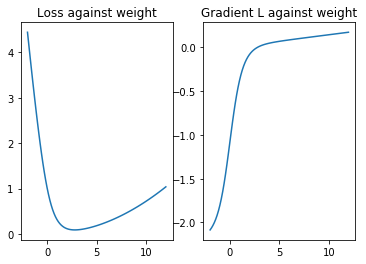

In [23]:
fake_weights_N= np.hstack([np.linspace(-2, 12, 100)[np.newaxis].T, np.zeros((100, 1))])
fake_weights_N= np.linspace(-2, 12, 100)
losslist = []
gradlist = []
for i in fake_weights_N:
    losslist.append(lr.calc_loss(i[np.newaxis], x_NF, y_N))
    gradlist.append(lr.calc_grad(i[np.newaxis], x_NF, y_N))
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False)
ax1.plot(fake_weights_N, losslist)

ax1.set_title('Loss against weight')
ax2.set_title('Gradient L against weight')
ax2.plot(fake_weights_N, gradlist)
f.savefig("1a.pdf", bbox_inches='tight')
    
    

### 1a caption

Visually inspect your plot. Does the loss trend make sense? Does the gradient look as expected? Justify your answers in the caption.


The loss trend makes sense because as my weights had increased, the loss decreases due to the fact I had no bias in my regression. Therefore, as the slope increased, it became a better fit to the points given. The decrease in loss flat lines towards the end because it seemed to have found the right weight. The gradient also makes sense because it descends while increasing the weight. The steepness also decreases towards the end because it converges which makes sense.



Also, by inspecting the loss plot, what is the approximate minimizing value $w^∗_1$ (within one or two decimal places)? Record this in your caption.

The weight it converges on is 2.784

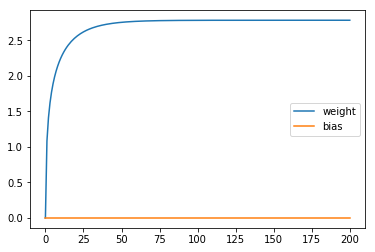

In [24]:
'''
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False)
ax1.plot(lr.trace_steps, np.array(lr.trace_w)[:,0])
plt.plot() 
ax1.set_title('Weight against Iterations')
ax2.set_title('Bias vs Iterations')
ax2.plot(lr.trace_steps, np.array(lr.trace_w)[:,1])
ax2.set_ylim([-1,2.5])
f.savefig("1b.pdf", bbox_inches='tight')
''' 
plt.plot(lr.trace_steps, np.array(lr.trace_w)[:,0], label = "weight")
plt.plot(lr.trace_steps, np.array(lr.trace_w)[:,1], label = "bias")
plt.legend()
plt.savefig("1b.pdf", bbox_inches='tight')

### 1b Caption

Do you see the expected trend?

I do see my expected trend because my weight increased to fit the data well. The bias stays the same because it is not needed to increase the bias to fit the data given. Therefore, an increase in weight is necessary. 

In [6]:
lr = LogisticRegressionGradientDescent(
        alpha=0.1, step_size=1.0, init_w_recipe='uniform_-1_to_1')

    # Prepare features by inserting column of all 1
xbias_NG = lr.insert_final_col_of_all_ones(x_NF)

print("Checking loss and grad at all zeros w vector")
w_G = np.zeros(2)
print("w_G = %s" % str(w_G))
print("loss(w_G) = %.3f" % lr.calc_loss(w_G, xbias_NG, y_N))
print("grad(w_G) = %s" % str(lr.calc_grad(w_G, xbias_NG, y_N)))

print("Trying gradient descent")
lr.fit(x_NF, y_N)


Checking loss and grad at all zeros w vector
w_G = [ 0.  0.]
loss(w_G) = 1.000
grad(w_G) = [-1.08202128  0.        ]
Trying gradient descent
Initializing w_G with 2 features using recipe: uniform_-1_to_1
Running up to 10000 iters of gradient descent with step_size 1
iter    0/10000  loss         0.932814  avg_L1_norm_grad         0.579579  w[0]    0.098 bias    0.430
iter    1/10000  loss         0.285311  avg_L1_norm_grad         0.192917  w[0]    1.099 bias    0.272
iter    2/10000  loss         0.196351  avg_L1_norm_grad         0.119929  w[0]    1.427 bias    0.214
iter    3/10000  loss         0.158926  avg_L1_norm_grad         0.086791  w[0]    1.633 bias    0.180
iter    4/10000  loss         0.138434  avg_L1_norm_grad         0.067501  w[0]    1.783 bias    0.157
iter    5/10000  loss         0.125692  avg_L1_norm_grad         0.054780  w[0]    1.900 bias    0.139
iter    6/10000  loss         0.117144  avg_L1_norm_grad         0.045726  w[0]    1.996 bias    0.125
iter    7/10

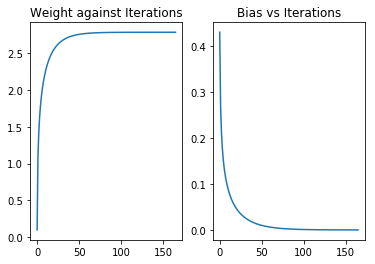

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False)
ax1.plot(lr.trace_steps, np.array(lr.trace_w)[:,0])
  
ax1.set_title('Weight against Iterations')
ax2.set_title('Bias vs Iterations')
ax2.plot(lr.trace_steps, np.array(lr.trace_w)[:,1])
f.savefig("1c.pdf", bbox_inches='tight')

### 1C caption

Do you see the expected trend?

Yes because despite the different initial recipe, it converges to the same values as before, with a bias of 0, and a slope of 2.784